In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

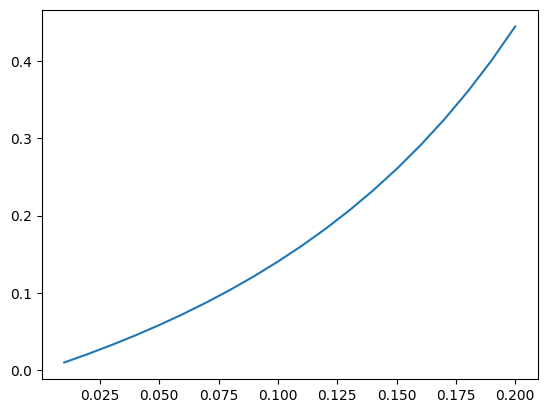

In [3]:
x = np.linspace(0.01, 0.20, 20)
var = x * (1 - x) / np.power((1 - 2 * x), 2)
plt.plot(x, var)

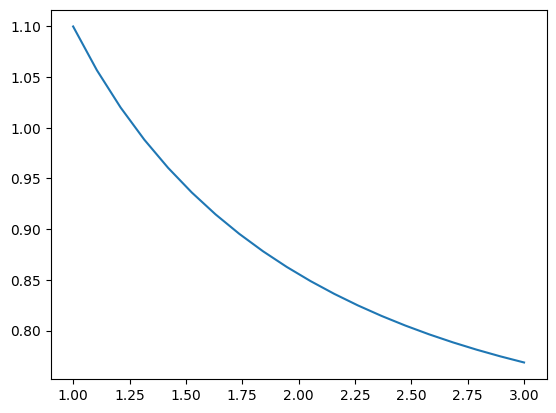

In [4]:
a = np.linspace(1, 3, 20)
x = 1.1
plt.plot(a, np.power(x, a) / np.sqrt(a))

In [33]:
def read_input(seed: int):
    with open(f"../tools/in/{seed:04}.txt", "r") as f:
        n, m, eps = f.readline().split()
        n, m, eps = int(n), int(m), float(eps)
        ds = []
        minos = []
        dense = 0
        for _ in range(m):
            s = f.readline().split()
            d, v = int(s[0]), list(map(int, s[1:]))
            v = [(v[2 * i], v[2 * i + 1]) for i in range(d)]
            ds.append(d)
            minos.append(v)
            dense += d
        dense /= n * n

    return n, m, eps, ds, minos, dense

In [34]:
data = []
for seed in range(3000):
    n, m, eps, ds, minos, dense = read_input(seed)
    data.append((f"tools/in/{seed:04}.txt", n, m, eps, dense))

In [36]:
df = pd.DataFrame(data, columns=["input_file", "n", "m", "eps", "dense"])
df.describe()

,n,m,eps,dense
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,14.929000,6.648667,0.103847,0.337081
std,3.126961,4.043020,0.057742,0.101028
min,10.000000,2.000000,0.010000,0.105469
25%,12.000000,4.000000,0.050000,0.253333
50%,15.000000,6.000000,0.100000,0.330579
75%,18.000000,9.000000,0.150000,0.412500
max,20.000000,20.000000,0.200000,0.764444


In [38]:
df.to_csv("../log/input.csv", index=False)

array([[<AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'m'}>],
       [<AxesSubplot:title={'center':'eps'}>,
        <AxesSubplot:title={'center':'dense'}>]], dtype=object)

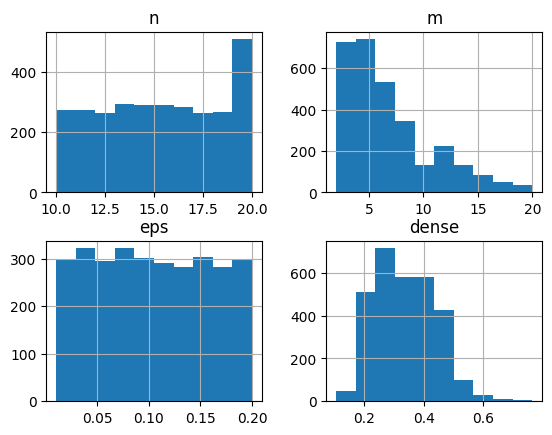

In [39]:
df.hist()

<AxesSubplot:xlabel='eps', ylabel='m'>

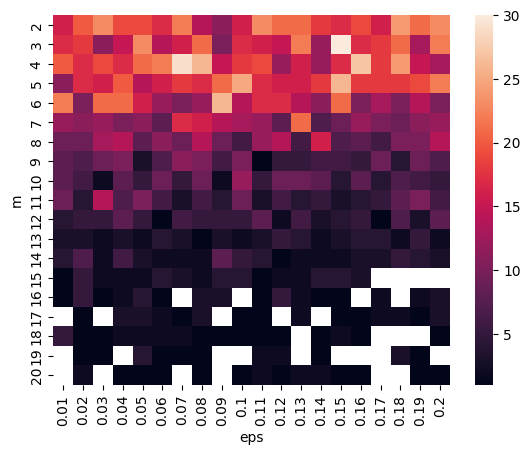

In [40]:
import seaborn as sns

sns.heatmap(df.pivot_table("n", index="m", columns="eps", aggfunc=len))